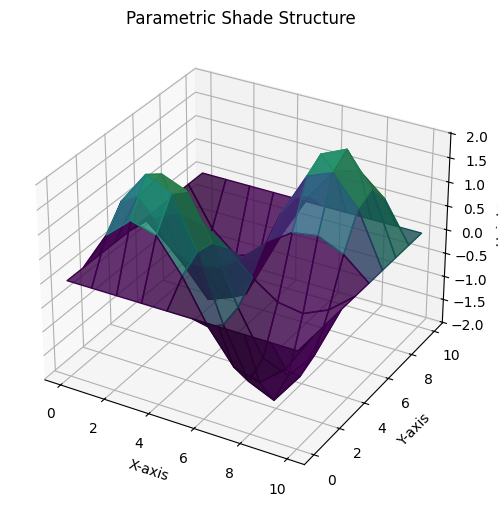

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
grid_size = 10  # Size of the canopy grid
panel_tilt = 30  # Default tilt angle in degrees

# Generate grid points for canopy base
x = np.linspace(0, 10, grid_size)
y = np.linspace(0, 10, grid_size)
X, Y = np.meshgrid(x, y)

# Adjust panel heights based on a sinusoidal wave (representing airflow design)
Z = 2 * np.sin(2 * np.pi * X / 10) * np.sin(2 * np.pi * Y / 10)

# Adjust tilt for shade optimization (e.g., based on simple solar model)
tilt_angles = np.arctan2(Z, 1) * 180 / np.pi  # Hypothetical model

# Visualize the structure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(tilt_angles / 90), rstride=1, cstride=1, alpha=0.8)

# Add some details
ax.set_title('Parametric Shade Structure')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Height')

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import radians, sin, cos, tan
import pvlib  # For solar position calculations

# Function to calculate solar position
def calculate_solar_position(lat, lon, time):
    times = [time]  # Use a single timestamp for simplicity
    solar_position = pvlib.solarposition.get_solarposition(times, lat, lon)
    altitude = solar_position['apparent_elevation'].values[0]
    azimuth = solar_position['azimuth'].values[0]
    return altitude, azimuth

# Set parameters
latitude = 52.0  # Example: Amsterdam latitude
longitude = 4.9  # Example: Amsterdam longitude
timestamp = datetime(2024, 6, 21, 12, 0)  # Noon on summer solstice
altitude, azimuth = calculate_solar_position(latitude, longitude, timestamp)

# Create parametric canopy structure
grid_size = 10
x = np.linspace(0, 10, grid_size)
y = np.linspace(0, 10, grid_size)
X, Y = np.meshgrid(x, y)

# Optimize tilt based on solar altitude and azimuth
panel_tilt = 90 - altitude  # Perpendicular tilt to the sun's rays
panel_rotation = radians(azimuth)  # Convert azimuth to radians

# Calculate Z heights and tilted panels
Z = np.zeros_like(X)
panel_height = 1  # Height of each panel
tilt_x = panel_height * tan(radians(panel_tilt)) * np.cos(panel_rotation)
tilt_y = panel_height * tan(radians(panel_tilt)) * np.sin(panel_rotation)

# Adjust Z for tilted panels
Z = X * tilt_x + Y * tilt_y

# Visualize the solar-optimized canopy
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(Z / np.max(Z)), alpha=0.8)

# Add labels
ax.set_title('Solar-Optimized Shade Structure')
ax.set_xlabel('X-axis (meters)')
ax.set_ylabel('Y-axis (meters)')
ax.set_zlabel('Height (meters)')

plt.show()

ModuleNotFoundError: No module named 'pvlib'